<a href="https://colab.research.google.com/github/Deb052024/Machine-Prediction/blob/main/Mobile_Handset_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_excel('/content/Processed_Flipdata.xlsx')

In [3]:
#info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [4]:
#Null value check
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [5]:
#EDA on the data set
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [6]:
#Duplicate Value check
df.duplicated().sum()

0

In [7]:
#Renaming Prize Column to Price
df.rename(columns={'Prize':'Price'},inplace=True)

In [8]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [9]:
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

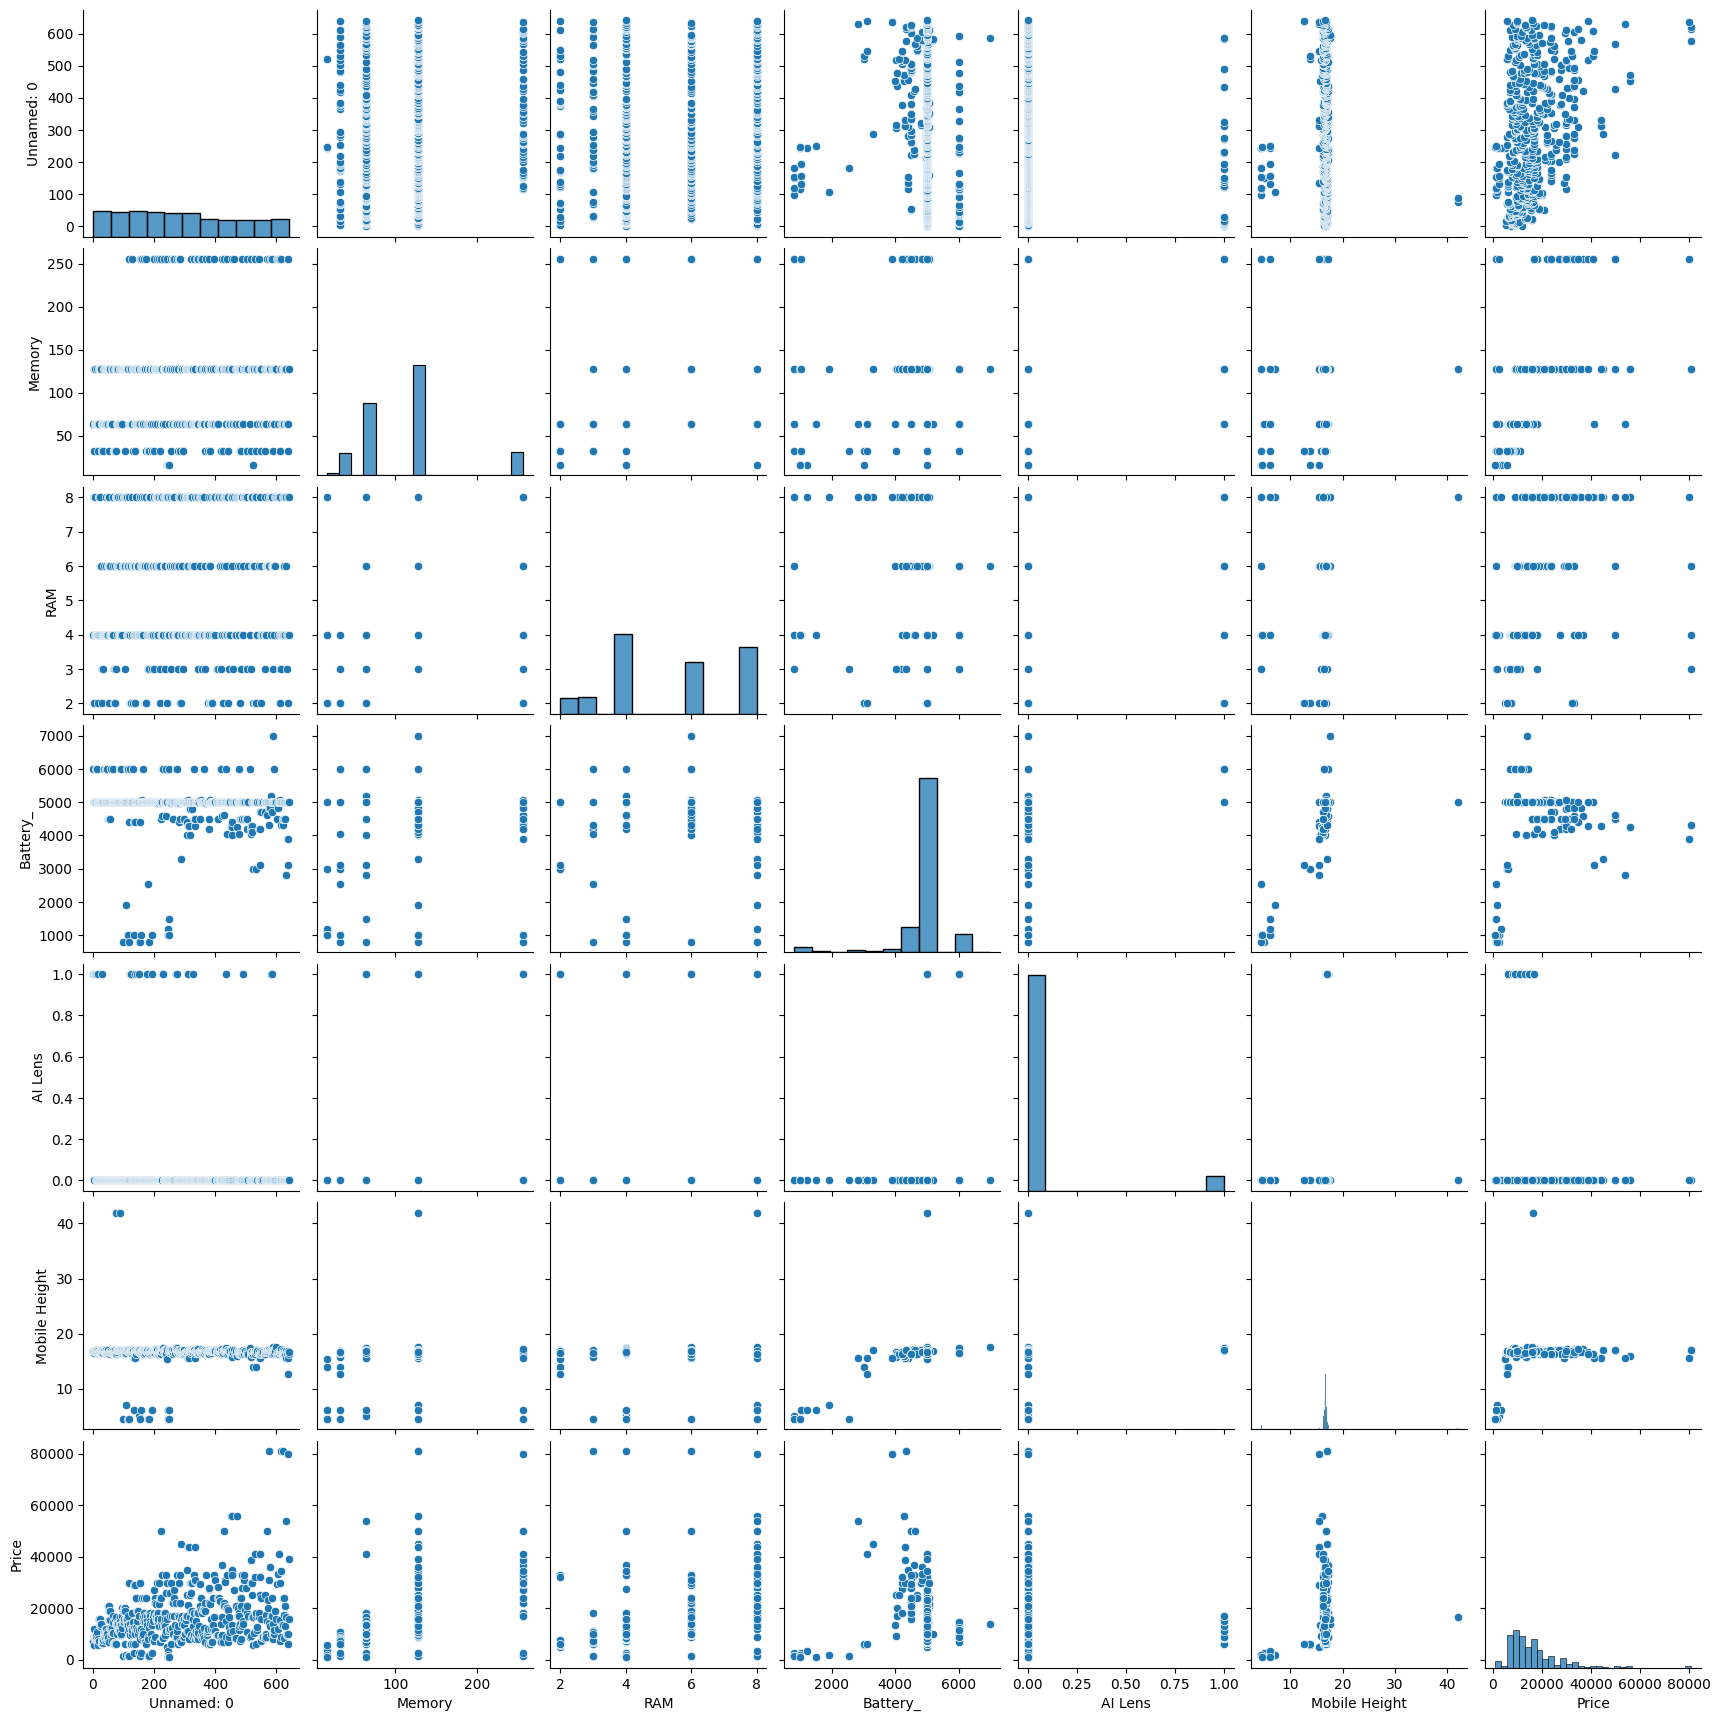

In [10]:
sns.pairplot(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [12]:
categorical_col=df[['Model','Colour','Rear Camera','Front Camera','Processor_']]
categorical_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [14]:
df['Model'].value_counts()

#df['Type Of Dwell'].value_counts().plot(kind='bar')

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
...,...
vivo Y1s,1
OnePlus Nord,1
Micromax 3,1


In [15]:
df_final=df.drop(['Unnamed: 0'],axis=1)
#Dropping unnecessary column from Analysis and puttingrest into df_final dataFrame

In [18]:
#Feature Values count,extraction and special attributes in Feature TreatMent
counter=3
def feature(df,columns,counter):
  for column in columns:
    feature_counts=df[column].value_counts()
    other_categories=feature_counts[feature_counts<counter].index
    df[column]=df[column].where(~df[column].isin(other_categories),'Lesser')

feature(df_final,categorical_col,counter)

# Optional: Print value counts for each column
for column in categorical_col:
    print(f"Value counts for {column}:")
    print(df_final[column].value_counts())
    print("\n")

Value counts for Model:
Model
Lesser                   144
SAMSUNG Galaxy A14 5G      9
REDMI Note 12 Pro 5G       9
vivo Y16                   9
realme C55                 9
                        ... 
realme Narzo 50            3
MOTOROLA g52               3
OPPO A17k                  3
realme 9 Pro+ 5G           3
vivo V25 Pro 5G            3
Name: count, Length: 89, dtype: int64


Value counts for Colour:
Colour
Lesser              295
Yellow               12
Power Black           8
Royal Blue            8
Black                 8
Midnight Black        7
Cool Blue             7
Aqua Blue             6
Glacier Blue          6
Force Black           6
Blue                  5
M3)                   5
Racing Black          5
OMG Black             5
Nebula Blue           5
Carbon Black          5
Light Green           5
Hyperspace            4
Light Silver          4
Horizon Blue          4
Dark Blue             4
Marine Blue           4
Light Blue            4
Night Sea             4
Pac

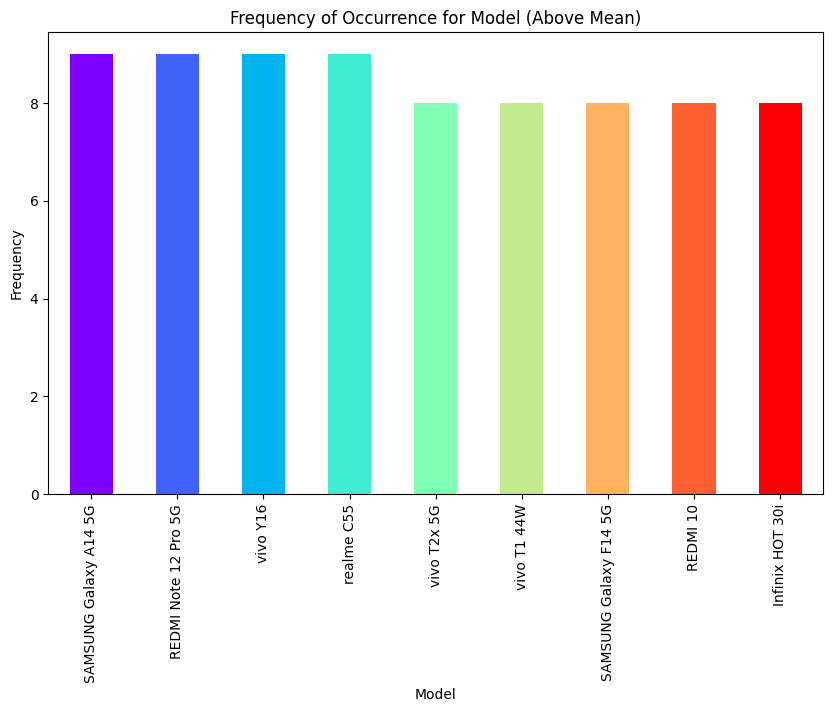

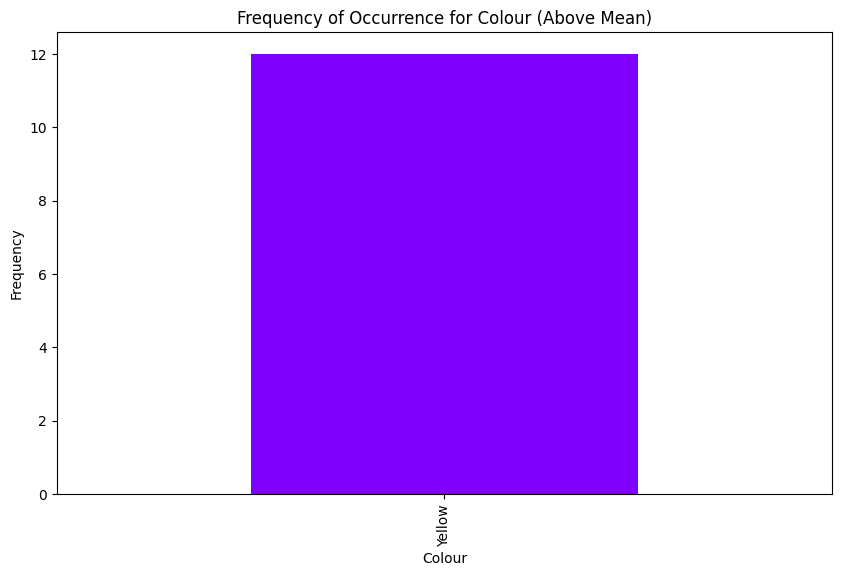

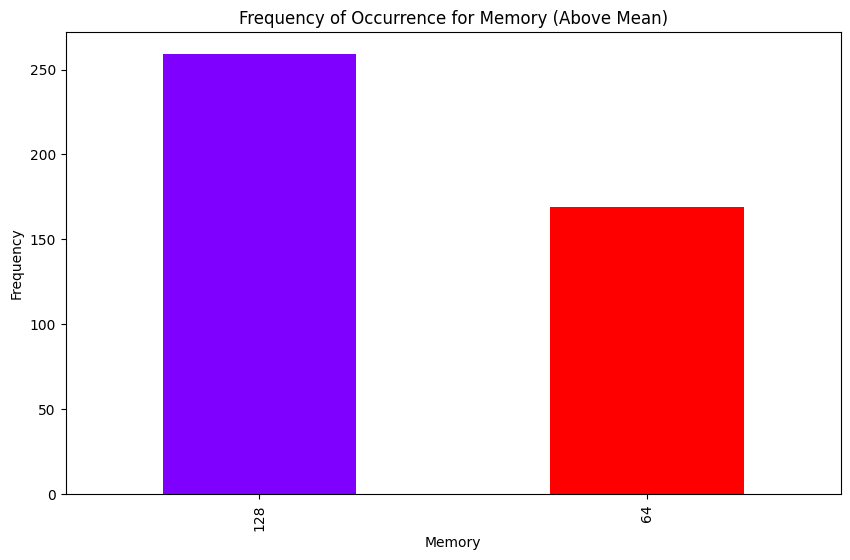

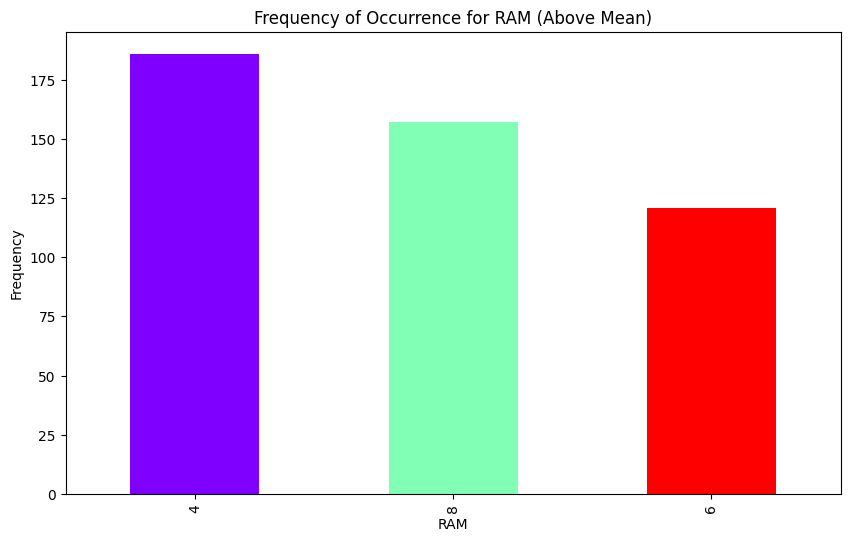

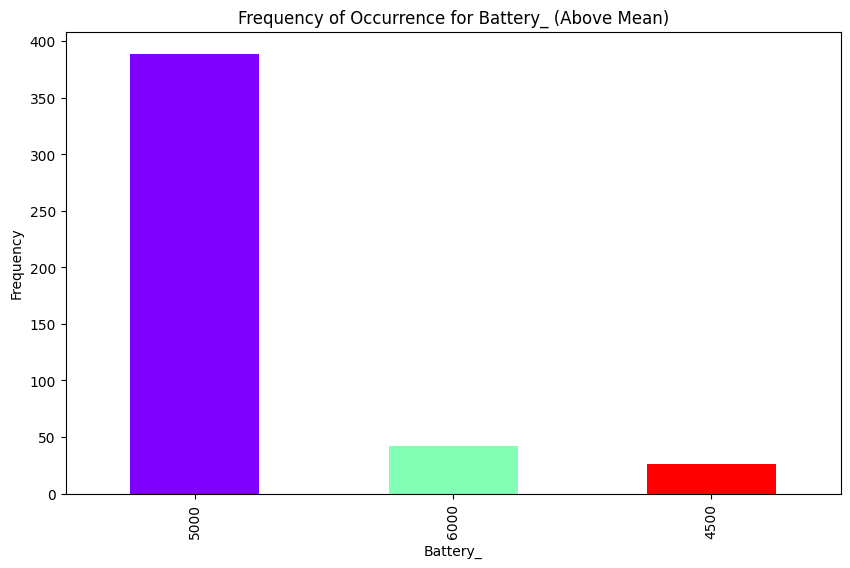

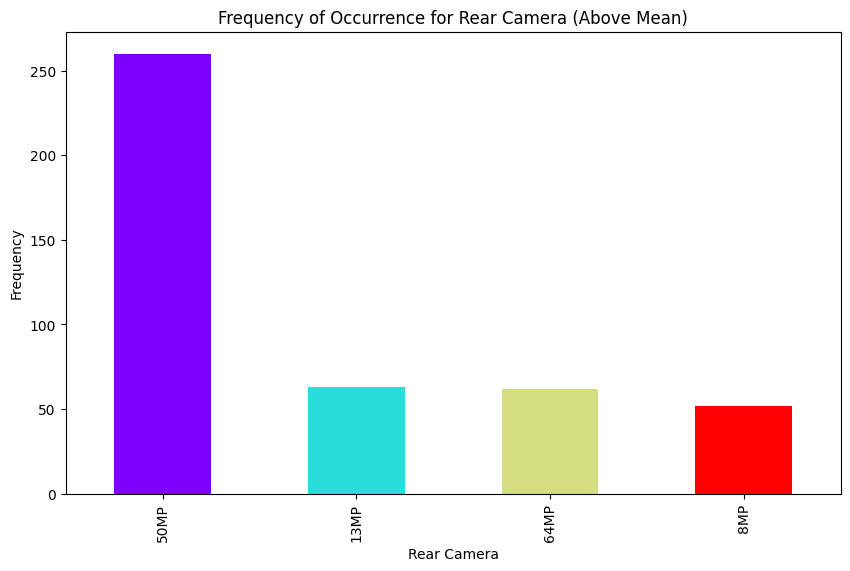

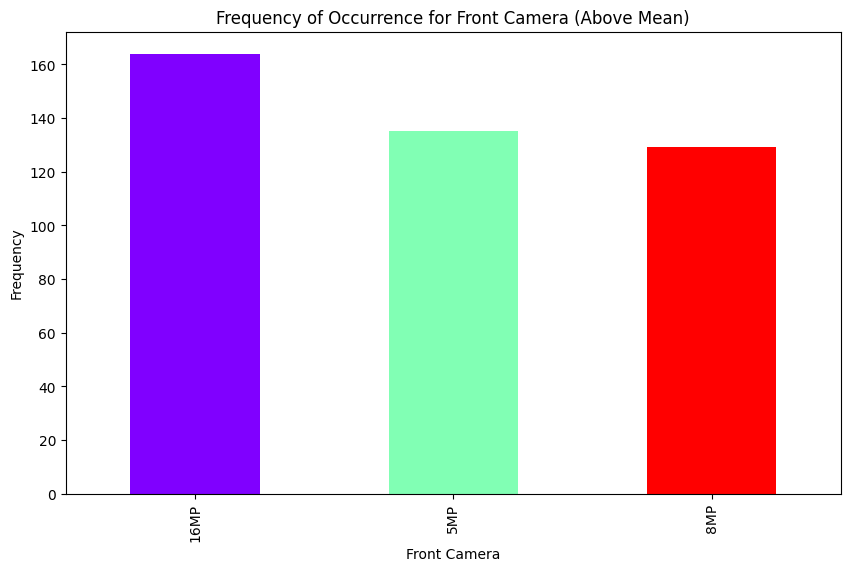

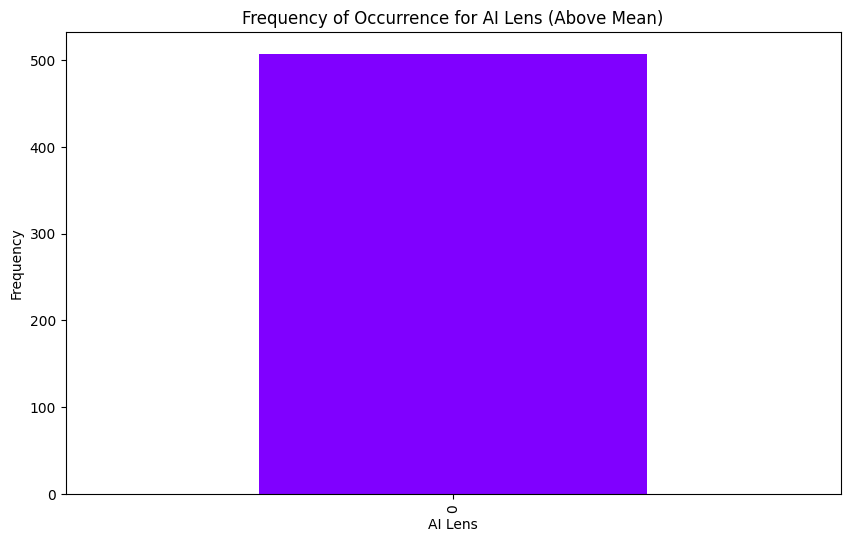

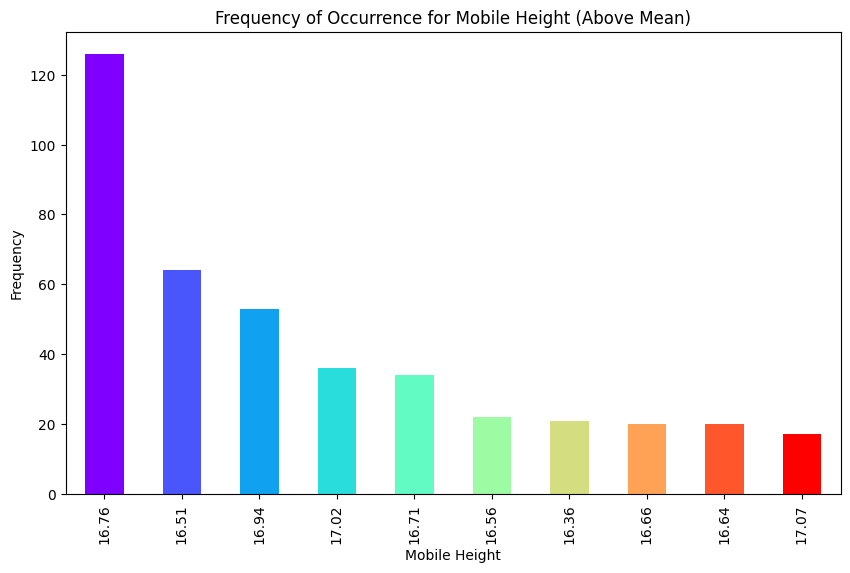

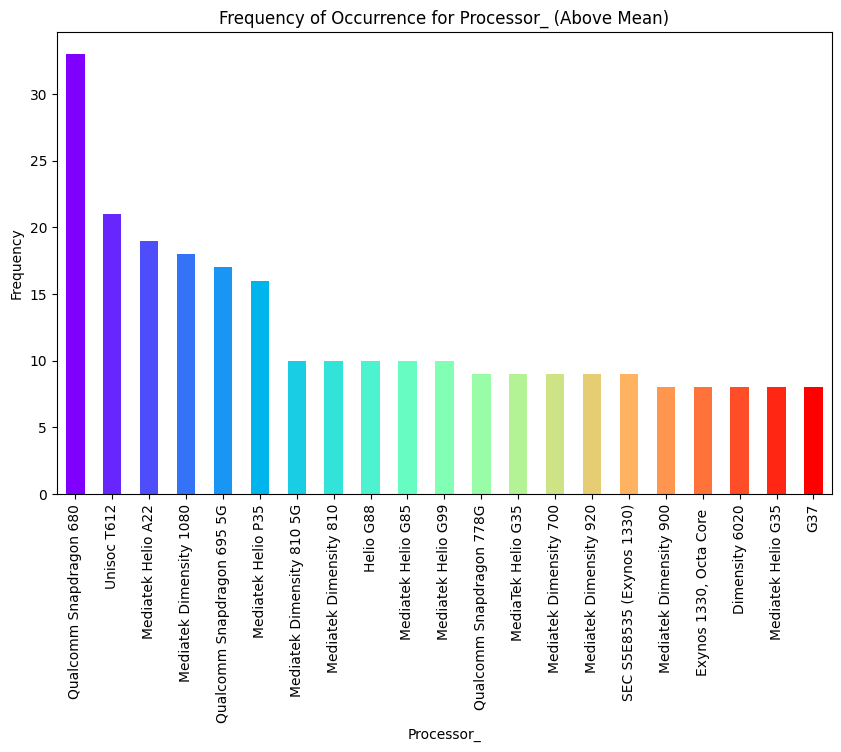

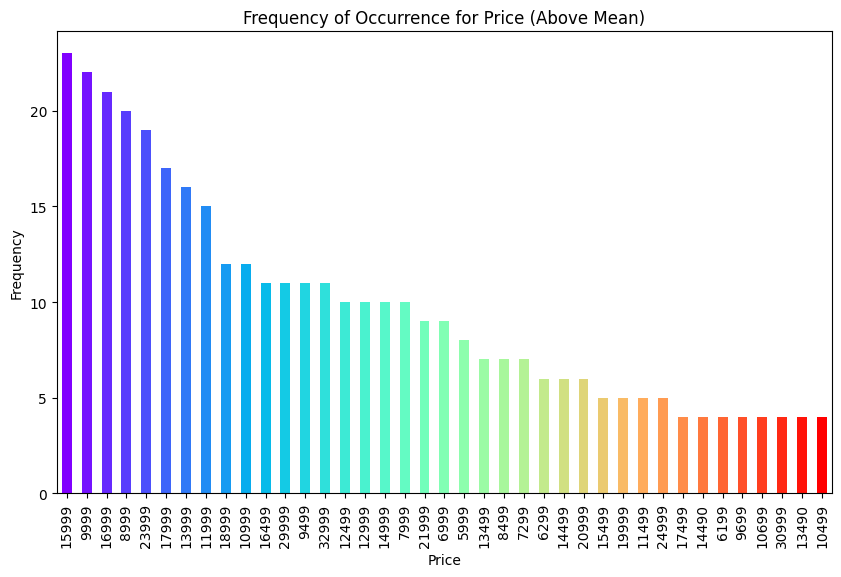

In [43]:
#Bar plot of the features other than Lesser  and its frequency of occurance is more than the mean value and plot color is rainbow

import matplotlib.pyplot as plt

for column in df_final:
  feature_counts = df_final[column].value_counts()
  features_above_mean = feature_counts[feature_counts > feature_counts.mean()]
  if not features_above_mean.empty:
    features_above_mean = features_above_mean[features_above_mean.index != 'Lesser']
    if not features_above_mean.empty:
      plt.figure(figsize=(10, 6))
      features_above_mean.plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, len(features_above_mean))))
      plt.title(f"Frequency of Occurrence for {column} (Above Mean)")
      plt.xlabel(column)
      plt.ylabel("Frequency")
      plt.show()


In [39]:
df_final['Model'].value_counts(['Lesser'])
#df['fuel_type'].isnull().value_counts()/len(df['fuel_type'])*100

,proportion
Model,
Lesser,0.266174
SAMSUNG Galaxy A14 5G,0.016636
REDMI Note 12 Pro 5G,0.016636
vivo Y16,0.016636
realme C55,0.016636
...,...
realme Narzo 50,0.005545
MOTOROLA g52,0.005545
OPPO A17k,0.005545


In [ ]:
for column in categorical_col:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()
    #Print the unique values in the categorical columns

Unique values in 'Model':
['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' 'mic

In [ ]:
df.groupby(['Model','Colour'])['Price'].mean().sort_values(ascending=False)
#Model and Colour wise grouping and Price Display

Model                  Colour       
APPLE iPhone 14 Plus   Midnight         80999.0
                       Purple           80999.0
                       Starlight        80999.0
SAMSUNG Galaxy S23 5G  Cream            79999.0
Google Pixel 7         Lemongrass       55999.0
                                         ...   
micromax               Light Silver      1375.0
micromax 2             Nebula Green      1299.0
micromax 1             Eclipse Black     1299.0
micromax               Lake Blue         1199.0
redmi min              M3)                920.0
Name: Price, Length: 386, dtype: float64

In [51]:
# prompt: find the apple models  with top 3 prices

apple_models = df_final[df_final['Model'].str.contains('Apple', case=False, na=False)]
top_3_apple_prices = apple_models.nlargest(3, 'Price')
print(top_3_apple_prices[['Model', 'Price']])


                    Model  Price
493  APPLE iPhone 14 Plus  80999
520  APPLE iPhone 14 Plus  80999
525  APPLE iPhone 14 Plus  80999


In [58]:
# Under Each Model Find the top 3 prices and fetch thier features

def get_top_3_prices_by_model(df):
  """
  Finds the top 3 highest prices for each model and returns their features.
  """
  top_3_prices_per_model = {}
  for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    top_3 = model_data.nlargest(3, 'Price')
    if not top_3.empty:
      top_3_prices_per_model[model] = top_3
  return top_3_prices_per_model


top_3_prices_dict = get_top_3_prices_by_model(df_final)

# Print the results (you can customize the output as needed)
for model, top_3_df in top_3_prices_dict.items():
  print(f"Top 3 Prices for Model: {model}")
  print(top_3_df[['Model', 'Price', 'Colour', 'Rear Camera', 'Processor_']])  # Include relevant features
  print("\n")


Top 3 Prices for Model: Infinix SMART 7
              Model  Price  Colour Rear Camera                  Processor_
0   Infinix SMART 7   7299  Lesser        13MP  Unisoc Spreadtrum SC9863A1
1   Infinix SMART 7   7299  Lesser        13MP  Unisoc Spreadtrum SC9863A1
12  Infinix SMART 7   7299  Lesser        13MP  Unisoc Spreadtrum SC9863A1


Top 3 Prices for Model: MOTOROLA G32
            Model  Price  Colour Rear Camera               Processor_
2    MOTOROLA G32  11999  Lesser        50MP  Qualcomm Snapdragon 680
43   MOTOROLA G32  11999  Lesser        50MP  Qualcomm Snapdragon 680
273  MOTOROLA G32  10999  Lesser        50MP  Qualcomm Snapdragon 680


Top 3 Prices for Model: POCO C50
        Model  Price      Colour Rear Camera          Processor_
53   POCO C50   6999  Royal Blue         8MP  Mediatek Helio A22
76   POCO C50   6299  Royal Blue         8MP  Mediatek Helio A22
106  POCO C50   6299      Lesser         8MP  Mediatek Helio A22


Top 3 Prices for Model: Infinix HOT 30i
    

In [57]:
#details of 493 row

row_details = df_final.loc[493]  # Note: DataFrame index starts from 0, so 493rd row is at index 492
print(row_details)


Model            APPLE iPhone 14 Plus
Colour                         Lesser
Memory                            128
RAM                                 6
Battery_                         4323
Rear Camera                      12MP
Front Camera                     12MP
AI Lens                             0
Mobile Height                   17.02
Processor_                     Lesser
Price                           80999
Name: 493, dtype: object


In [52]:
df.iloc[493,].describe()

,493
count,12
unique,11
top,12MP
freq,2


In [44]:
# prompt: find the features of under each model  with highest price, their features and their count

# Group by 'Model' and find the maximum price for each model
highest_price_by_model = df_final.groupby('Model')['Price'].max()

# Iterate through each model and find the corresponding features and their counts
for model, highest_price in highest_price_by_model.items():
  # Get the rows with the current model and the highest price
  rows_with_highest_price = df_final[(df_final['Model'] == model) & (df_final['Price'] == highest_price)]

  print(f"\nModel: {model}, Highest Price: {highest_price}")

  # Iterate through features and display their values and counts
  for column in df_final.columns:
      if column != 'Model' and column != 'Price':
          feature_counts = rows_with_highest_price[column].value_counts()
          if not feature_counts.empty:
              print(f"  {column}:")
              for feature, count in feature_counts.items():
                  print(f"    {feature}: {count}")




Model: APPLE iPhone 14 Plus, Highest Price: 80999
  Colour:
    Lesser: 3
  Memory:
    128: 3
  RAM:
    6: 1
    3: 1
    4: 1
  Battery_:
    4323: 3
  Rear Camera:
    12MP: 3
  Front Camera:
    12MP: 3
  AI Lens:
    0: 3
  Mobile Height:
    17.02: 3
  Processor_:
    Lesser: 2
    ios: 1

Model: Google Pixel 6a, Highest Price: 30999
  Colour:
    Lesser: 1
  Memory:
    128: 1
  RAM:
    8: 1
  Battery_:
    4500: 1
  Rear Camera:
    50MP: 1
  Front Camera:
    16MP: 1
  AI Lens:
    0: 1
  Mobile Height:
    16.64: 1
  Processor_:
    Qualcomm Snapdragon 778G+: 1

Model: Google Pixel 7, Highest Price: 55999
  Colour:
    Lesser: 3
  Memory:
    128: 3
  RAM:
    8: 3
  Battery_:
    4270: 3
  Rear Camera:
    50MP: 3
  Front Camera:
    8MP: 3
  AI Lens:
    0: 3
  Mobile Height:
    16.0: 3
  Processor_:
    Google Tensor G2: 3

Model: Google Pixel 7a, Highest Price: 43999
  Colour:
    Lesser: 3
  Memory:
    128: 3
  RAM:
    8: 3
  Battery_:
    4300: 3
  Rear Camera:
  

In [ ]:
df.groupby(['Model','Rear Camera'])['Price'].mean().sort_values(ascending=False).head(30)

,,Price
Model,Rear Camera,
APPLE iPhone 14 Plus,12MP,80999.000000
SAMSUNG Galaxy S23 5G,50MP,79999.000000
Google Pixel 7,50MP,55999.000000
APPLE iPhone 12,12MP,53999.000000
MOTOROLA Edge 30 Ultra,200MP,49999.000000
SAMSUNG Galaxy S22 Plus 5G,50MP,49999.000000
SAMSUNG Galaxy Z Flip3 5G,12MP,44999.000000
Google Pixel 7a,64MP,43999.000000
APPLE iPhone 11,12MP,41199.000000


In [ ]:
df_final.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Price'],
      dtype='object')

In [ ]:
numerical_col=df_final[['Memory','RAM','Battery_','AI Lens','Mobile Height','Price']]
numerical_col

,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,64,4,6000,1,16.76,7299
1,64,4,6000,1,16.76,7299
2,128,8,5000,0,16.64,11999
3,32,2,5000,0,16.56,5649
4,128,8,5000,1,16.76,8999
...,...,...,...,...,...,...
536,256,8,3900,0,15.49,79999
537,32,2,3100,0,12.70,5998
538,64,4,5000,0,16.76,9990
539,128,8,5000,0,16.26,38999


<Axes: >

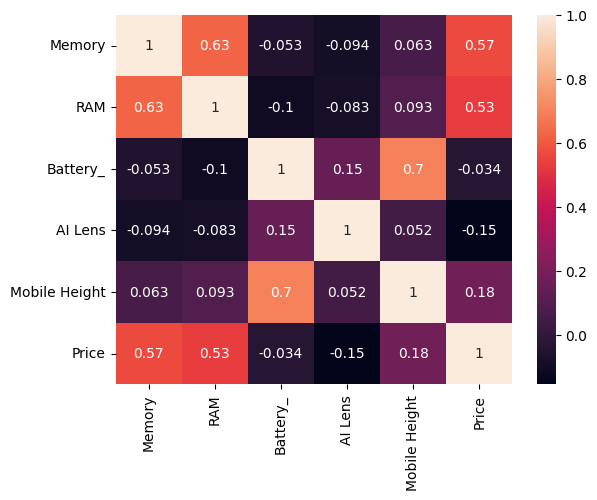

In [ ]:
sns.heatmap(numerical_col.corr(),annot=True)

In [ ]:
df['Battery_'].corr(df['Memory'])

-0.05321023663220388

In [ ]:
#Label Encoding the Categorical Features
le=LabelEncoder()
for column in categorical_col:
  df_final[column]=le.fit_transform(df_final[column])


<Axes: >

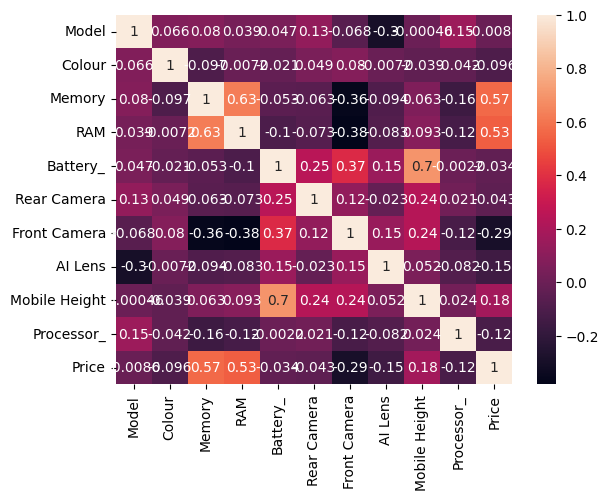

In [ ]:
sns.heatmap(df_final.corr(),annot=True)

In [ ]:
df_final.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
Model,1.000000,0.066469,0.079546,0.039078,0.046978,0.125517,-0.067923,-0.299453,-0.000457,0.153663,-0.008591
Colour,0.066469,1.000000,-0.097242,-0.007154,-0.021033,0.048796,0.079634,-0.007244,-0.039224,-0.041765,-0.095782
Memory,0.079546,-0.097242,1.000000,0.625284,-0.053210,-0.062725,-0.361646,-0.094442,0.063163,-0.155522,0.566660
RAM,0.039078,-0.007154,0.625284,1.000000,-0.104923,-0.073380,-0.381846,-0.082622,0.092951,-0.124870,0.532024
Battery_,0.046978,-0.021033,-0.053210,-0.104923,1.000000,0.245957,0.374791,0.150156,0.695641,-0.002150,-0.034297
Rear Camera,0.125517,0.048796,-0.062725,-0.073380,0.245957,1.000000,0.124321,-0.022927,0.235373,0.021044,-0.043153
Front Camera,-0.067923,0.079634,-0.361646,-0.381846,0.374791,0.124321,1.000000,0.146588,0.237274,-0.120970,-0.290620
AI Lens,-0.299453,-0.007244,-0.094442,-0.082622,0.150156,-0.022927,0.146588,1.000000,0.052018,-0.082015,-0.153691
Mobile Height,-0.000457,-0.039224,0.063163,0.092951,0.695641,0.235373,0.237274,0.052018,1.000000,0.023778,0.176009
Processor_,0.153663,-0.041765,-0.155522,-0.124870,-0.002150,0.021044,-0.120970,-0.082015,0.023778,1.000000,-0.115475


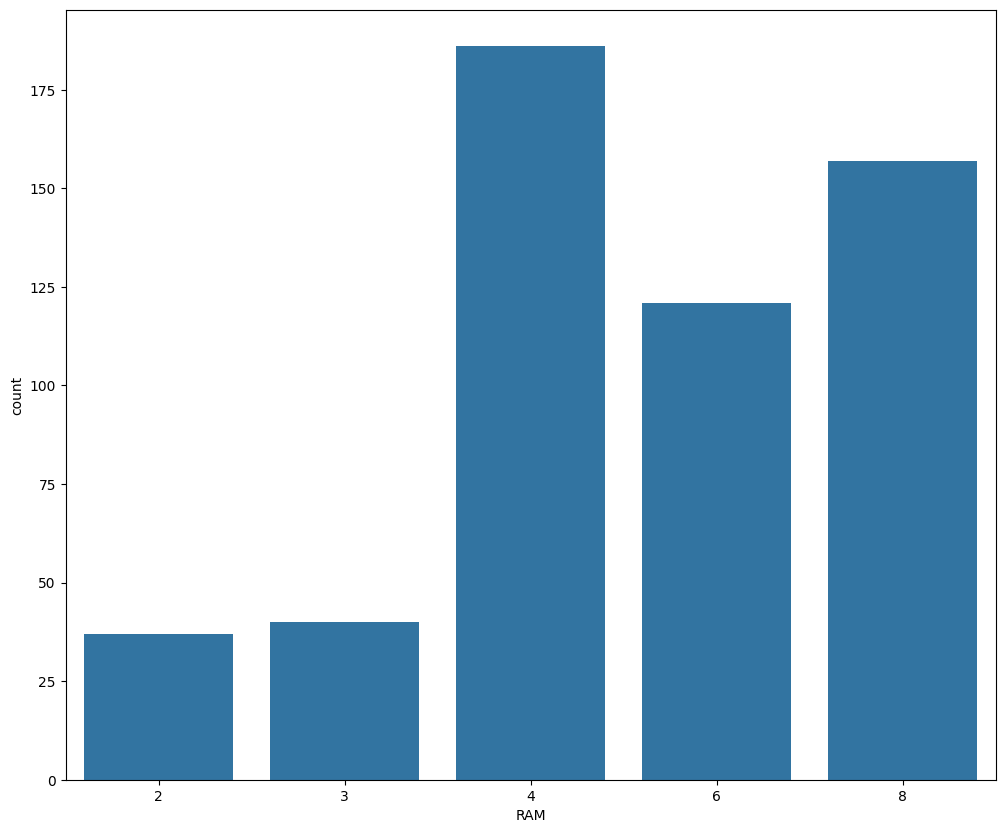

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['RAM'])
sns.set_style('darkgrid')

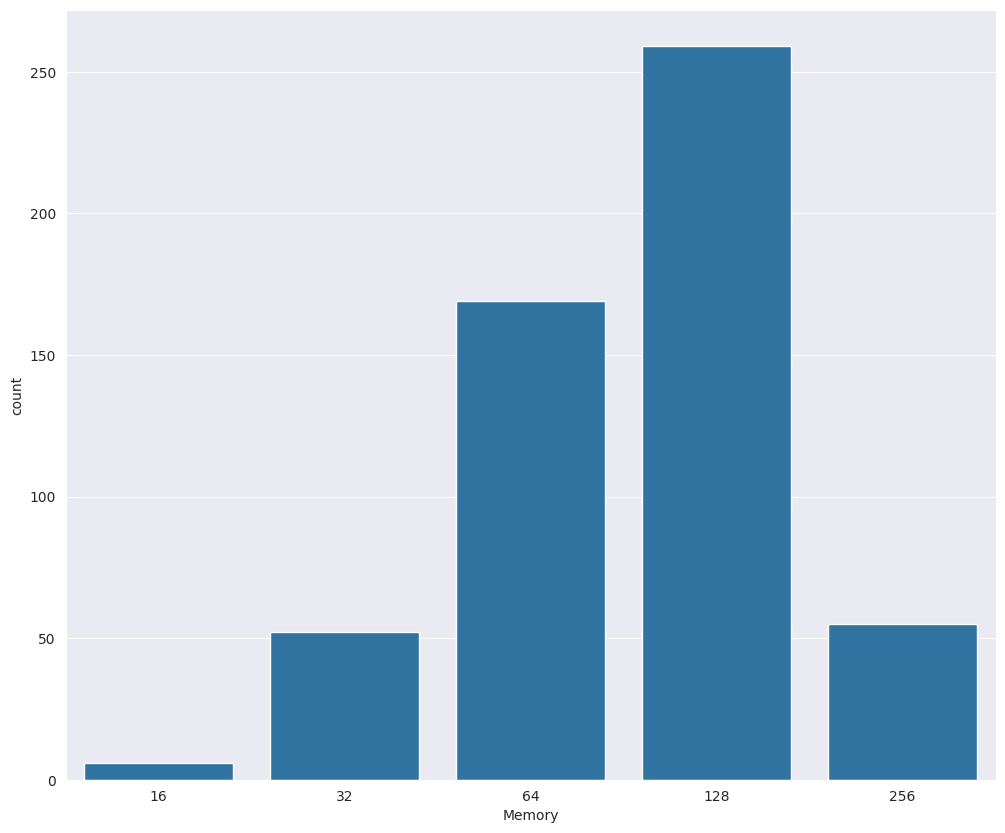

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Memory'])
sns.set_style('darkgrid')

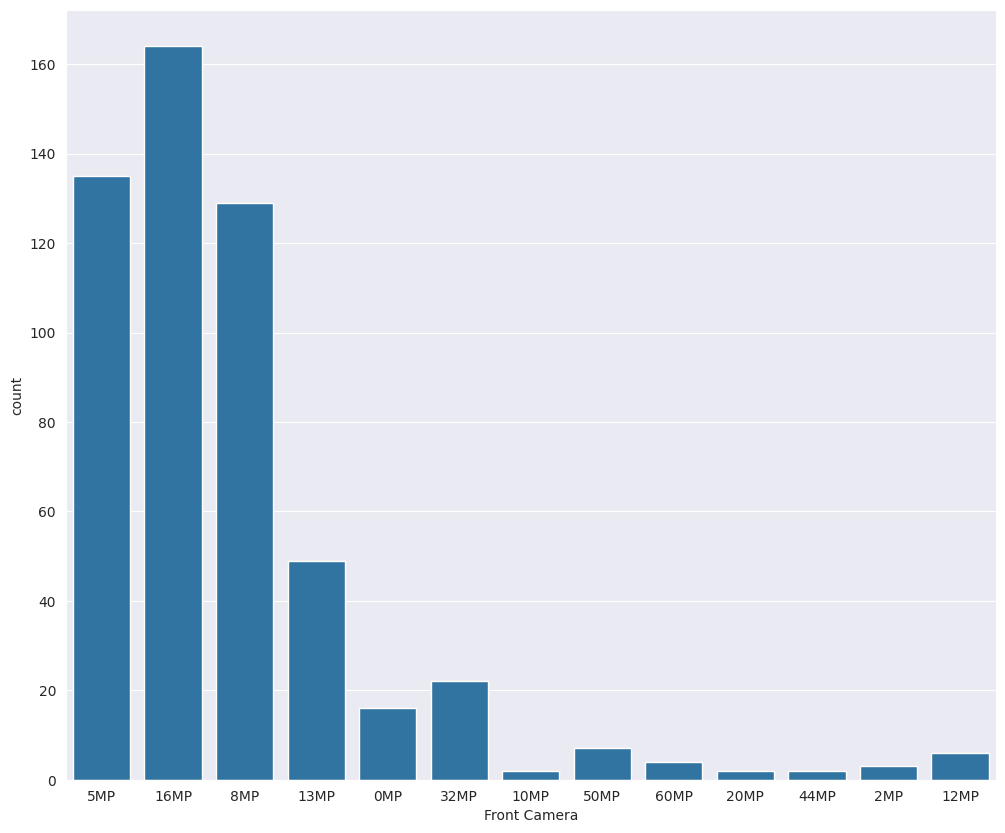

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['Front Camera'])
sns.set_style('darkgrid')

<Axes: xlabel='Price'>

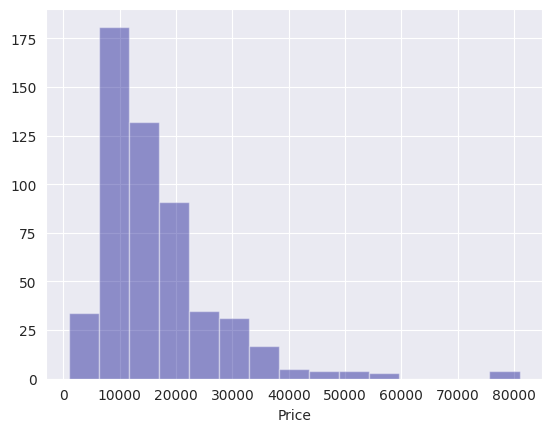

In [ ]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

<Axes: xlabel='Battery_', ylabel='Density'>

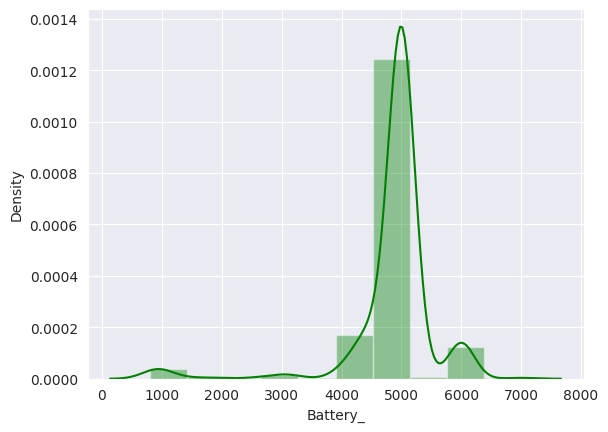

In [ ]:
sns.distplot(df['Battery_'].dropna(),kde=True,color='green',bins=10)

In [ ]:
df_final

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,10,28,64,4,6000,3,7,1,16.76,64,7299
1,10,28,64,4,6000,3,7,1,16.76,64,7299
2,18,28,128,8,5000,7,3,0,16.64,45,11999
3,29,50,32,2,5000,10,7,0,16.56,33,5649
4,6,28,128,8,5000,7,7,1,16.76,8,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,16,28,256,8,3900,7,1,0,15.49,14,79999
537,16,28,32,2,3100,8,4,0,12.70,42,5998
538,16,58,64,4,5000,7,9,0,16.76,17,9990
539,52,28,128,8,5000,7,5,0,16.26,6,38999


**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df_final.iloc[:,0:10] # Independent columns
y = df_final.iloc[:,[-1]]

In [ ]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_
0,10,28,64,4,6000,3,7,1,16.76,64
1,10,28,64,4,6000,3,7,1,16.76,64
2,18,28,128,8,5000,7,3,0,16.64,45
3,29,50,32,2,5000,10,7,0,16.56,33
4,6,28,128,8,5000,7,7,1,16.76,8
...,...,...,...,...,...,...,...,...,...,...
536,16,28,256,8,3900,7,1,0,15.49,14
537,16,28,32,2,3100,8,4,0,12.70,42
538,16,58,64,4,5000,7,9,0,16.76,17
539,52,28,128,8,5000,7,5,0,16.26,6


In [ ]:
y

,Price
0,7299
1,7299
2,11999
3,5649
4,8999
...,...
536,79999
537,5998
538,9990
539,38999


In [ ]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Model,4434.824602
1,Colour,768.170693
2,Memory,14126.732211
3,RAM,305.284365
4,Battery_,61410.920261
5,Rear Camera,339.381693
6,Front Camera,512.545959
7,AI Lens,212.897549
8,Mobile Height,144.142050
9,Processor_,3222.077329


In [ ]:
print(featureScores.nlargest(4,'Score'))

        Specs         Score
4    Battery_  61410.920261
2      Memory  14126.732211
0       Model   4434.824602
9  Processor_   3222.077329


**Feature Importance**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.1715568  0.06987304 0.08020353 0.10441898 0.0697252  0.09667407
 0.08166798 0.01567373 0.13688023 0.17332644]


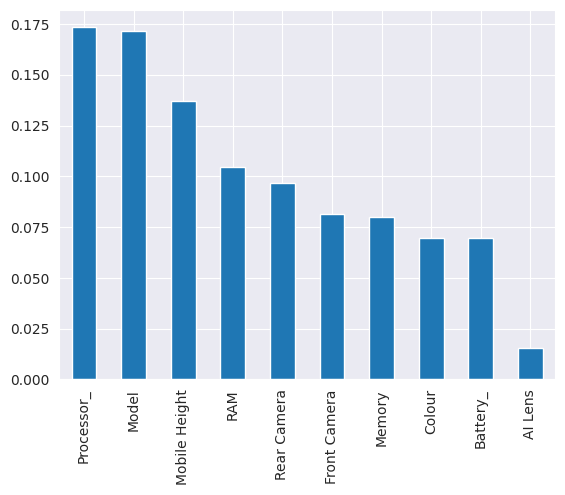

In [ ]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [ ]:
df.groupby(['Memory','RAM','Model'])['Price'].mean().sort_values(ascending=False)

Memory  RAM  Model                
128     3    APPLE iPhone 14 Plus     80999.0
        4    APPLE iPhone 14 Plus     80999.0
        6    APPLE iPhone 14 Plus     80999.0
256     8    SAMSUNG Galaxy S23 5G    79999.0
128     8    Google Pixel 7           55999.0
                                       ...   
32      3    micromax                  1375.0
256     8    micromax 1                1299.0
             micromax 2                1299.0
64      4    micromax                  1199.0
16      4    redmi min                  920.0
Name: Price, Length: 283, dtype: float64

In [ ]:
df.sort_values('Price',ascending=False)
#Sorting Features based on Price

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
520,614,APPLE iPhone 14 Plus,Purple,128,3,4323,12MP,12MP,0,17.02,6 Core,80999
493,576,APPLE iPhone 14 Plus,Midnight,128,6,4323,12MP,12MP,0,17.02,IOS,80999
525,621,APPLE iPhone 14 Plus,Starlight,128,4,4323,12MP,12MP,0,17.02,ios,80999
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
416,452,Google Pixel 7,Snow,128,8,4270,50MP,8MP,0,16.00,Google Tensor G2,55999
...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,micromax 1,Eclipse Black,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
155,155,micromax 2,Nebula Green,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
250,250,micromax,Lake Blue,64,4,1500,0MP,0MP,0,6.10,Mediatek MT6261D,1199
247,247,redmi min,M3),16,4,1000,0MP,0MP,0,4.57,Spreadtrum,920


In [ ]:
def find_skewness(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns

    # Calculate skewness for each numeric column
    skewness = df[numeric_columns].skew()

    # Print skewness for each column
    for col, skew_value in skewness.items():
        print(f'Skewness of {col}: {skew_value:.4f}')

    return skewness
#Find Skewness of the numeric columns

In [ ]:
find_skewness(df_final)

Skewness of Model: 0.4641
Skewness of Colour: 0.2490
Skewness of Memory: 1.0297
Skewness of RAM: 0.0676
Skewness of Battery_: -3.3042
Skewness of Rear Camera: -0.7500
Skewness of Front Camera: -0.0729
Skewness of AI Lens: 3.6126
Skewness of Mobile Height: 1.1718
Skewness of Processor_: 0.1859
Skewness of Price: 2.4256


,0
Model,0.464149
Colour,0.248955
Memory,1.029704
RAM,0.067617
Battery_,-3.304250
Rear Camera,-0.749997
Front Camera,-0.072900
AI Lens,3.612638
Mobile Height,1.171778
Processor_,0.185926


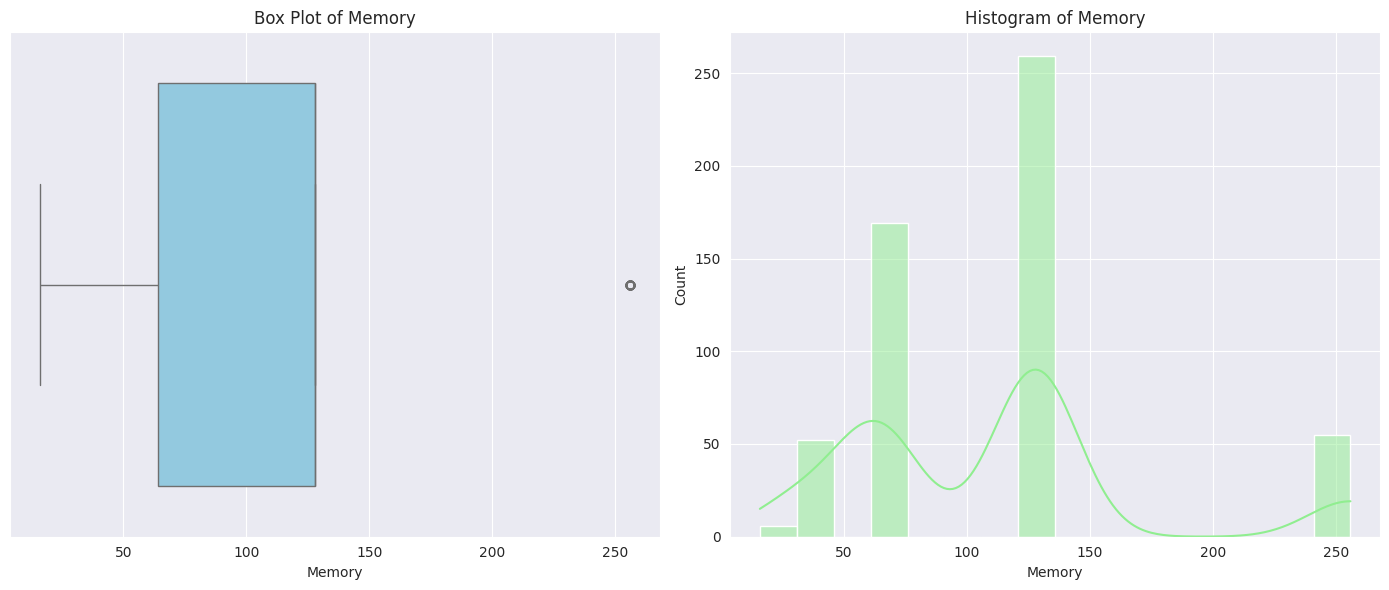

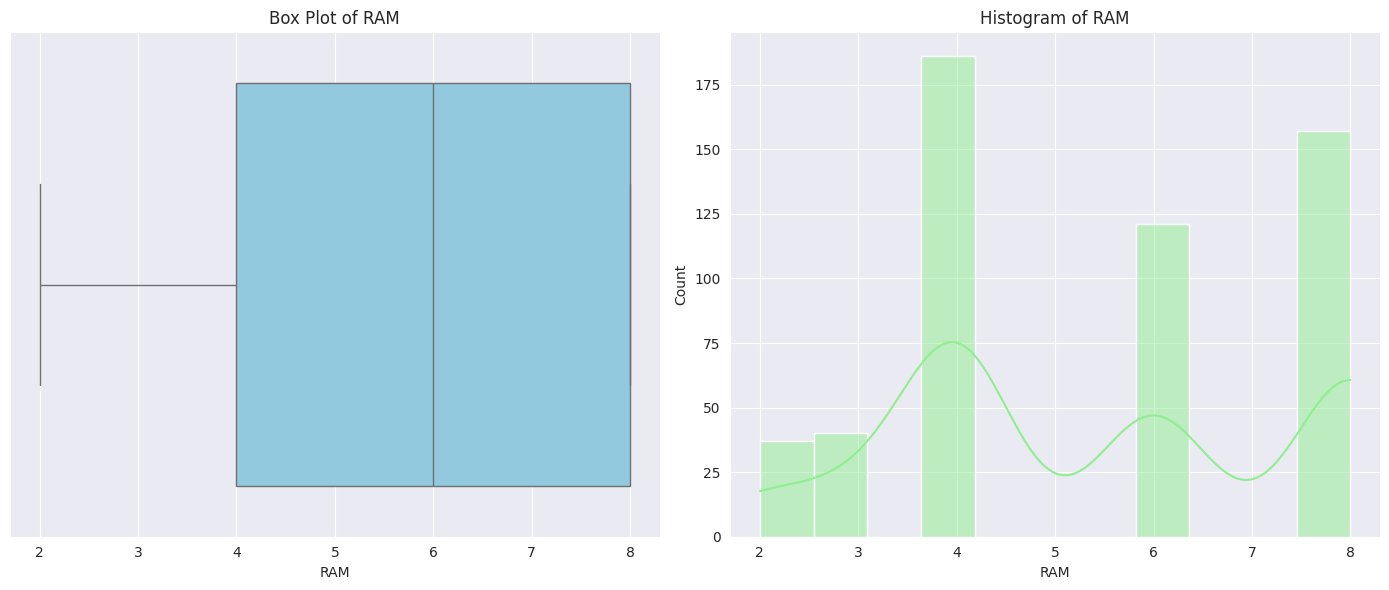

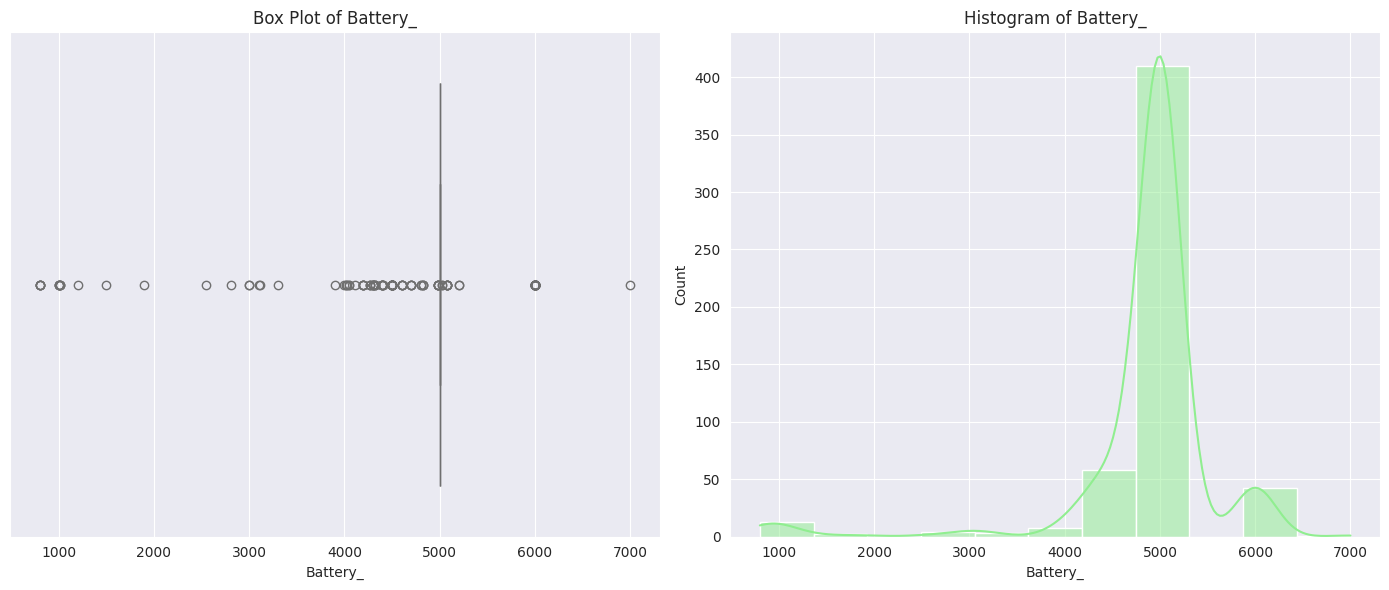

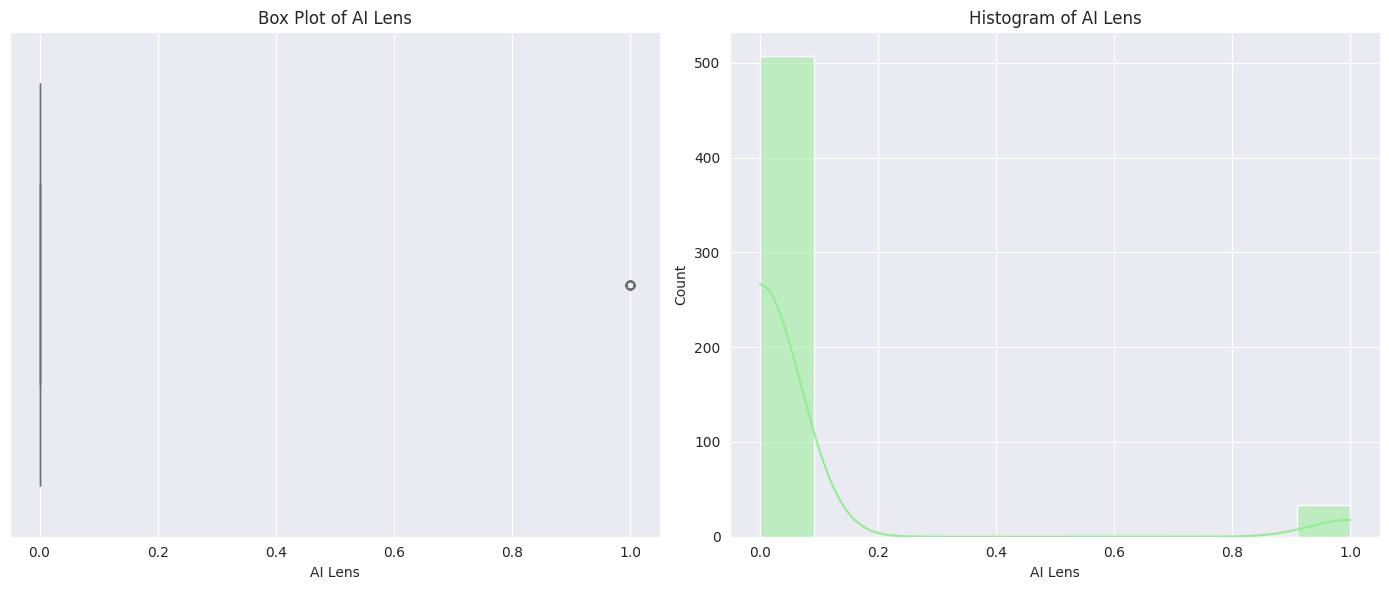

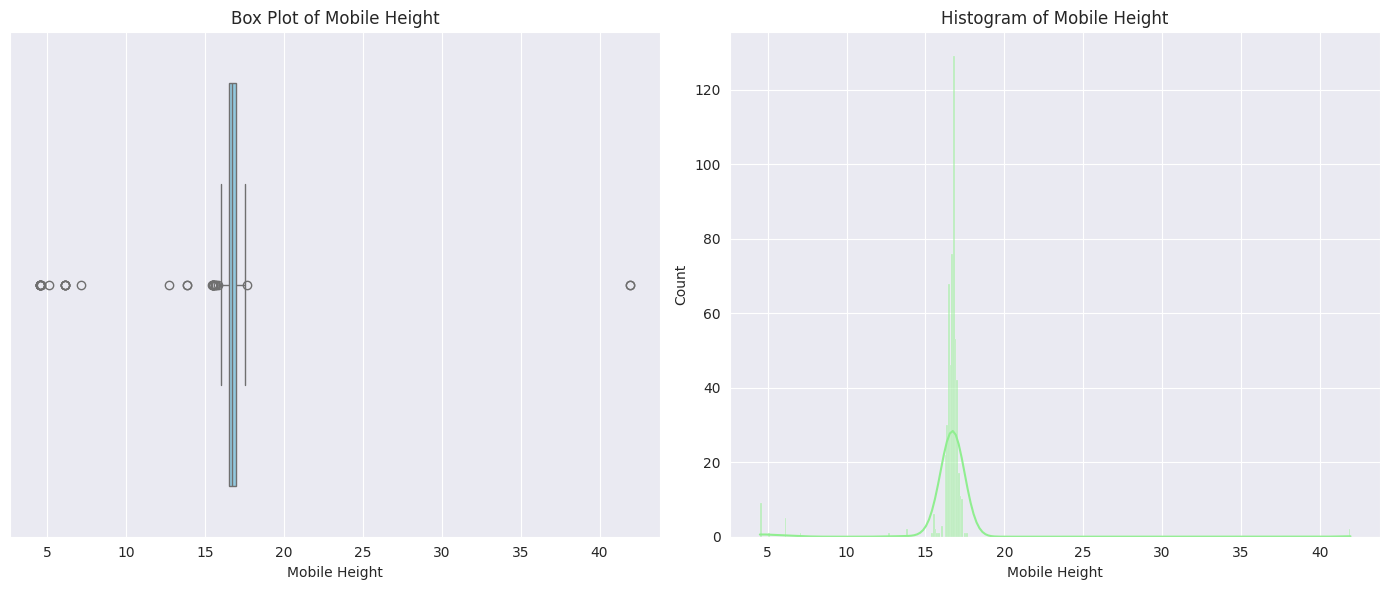

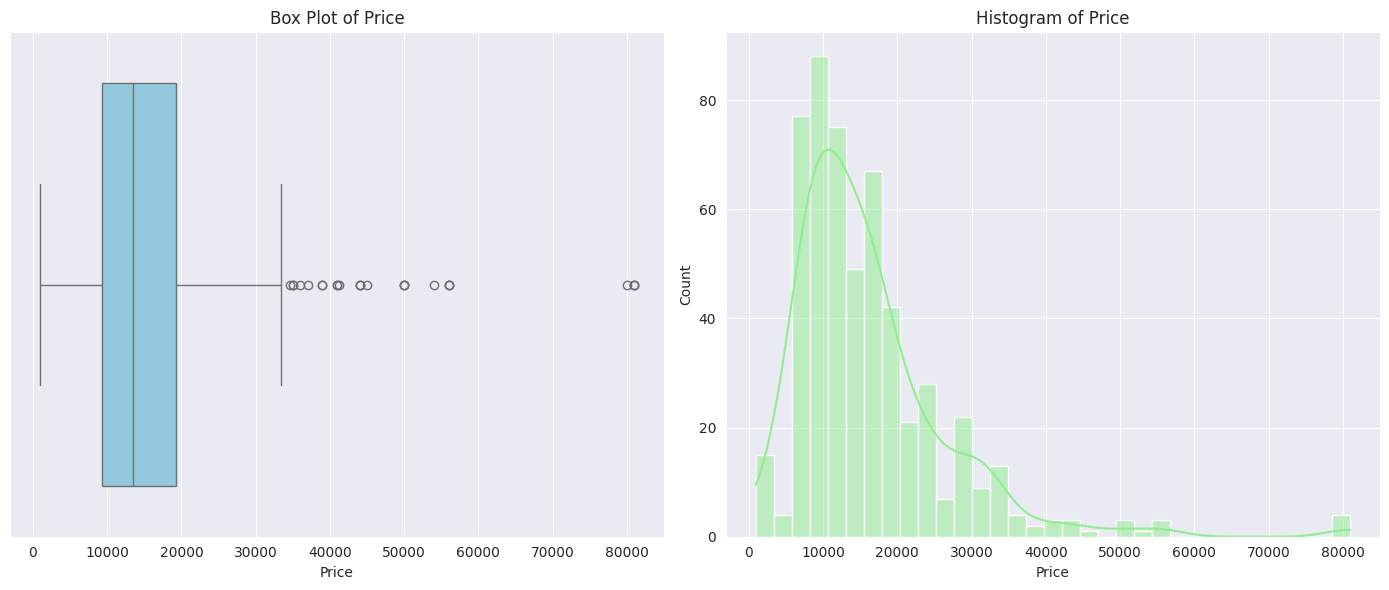

In [ ]:

    for col in numerical_col:
        plt.figure(figsize=(14, 6))

        # Box plot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_final[col], color='skyblue')
        plt.title(f'Box Plot of {col}')

        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(df_final[col], kde=True, color='lightgreen')
        plt.title(f'Histogram of {col}')

        plt.tight_layout()
        plt.show()

        #Box Plot and HistPlot

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    int64  
 1   Colour         541 non-null    int64  
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    int64  
 6   Front Camera   541 non-null    int64  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    int64  
 10  Price          541 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 46.6 KB


In [ ]:
df_final.describe()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,38.085028,28.898336,110.550832,5.397412,4871.587800,6.404806,5.467652,0.062847,16.431201,32.940850,16228.375231
std,24.870036,12.147505,60.600694,1.984923,780.148862,2.581396,2.813553,0.242911,2.523553,19.054314,10793.588322
min,0.000000,0.000000,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,0.000000,920.000000
25%,16.000000,28.000000,64.000000,4.000000,5000.000000,6.000000,3.000000,0.000000,16.510000,14.000000,9290.000000
50%,34.000000,28.000000,128.000000,6.000000,5000.000000,7.000000,7.000000,0.000000,16.710000,33.000000,13499.000000
75%,58.000000,28.000000,128.000000,8.000000,5000.000000,7.000000,8.000000,0.000000,16.940000,47.000000,19280.000000
max,88.000000,59.000000,256.000000,8.000000,7000.000000,11.000000,10.000000,1.000000,41.940000,70.000000,80999.000000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train Test Data Split

In [ ]:
lr=LinearRegression()
#Linear Regression Model

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=lr.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.314535259204032
4512.470979562527
94476093.10322902


In [ ]:
#Training Score
print("Training Accuracy",lr.score(X_train,y_train))
#Testing Score
print("Testing Score",lr.score(X_test,y_test))

Training Accuracy 0.4404197037688825
Testing Score 0.314535259204032


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_predict=dt.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6759737799155855
1565.7614678899083
44659819.119266056


In [ ]:
#Training Score
print("Training Accuracy",dt.score(X_train,y_train))
#Testing Score
print("Testing Score",dt.score(X_test,y_test))

Training Accuracy 0.9991704922816174
Testing Score 0.6759737799155855


In [ ]:
from sklearn.svm import SVR
#Support Vector Regressor

In [ ]:
sv=SVR()
sv.fit(X_train,y_train)

SVR()

In [ ]:
y_predict=sv.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

-0.019440095212552633
6986.089000418016
140507179.45991877


In [ ]:
#Training Score
print("Training Accuracy",sv.score(X_train,y_train))
#Testing Score
print("Testing Score",sv.score(X_test,y_test))

Training Accuracy -0.05096519980663161
Testing Score -0.019440095212552633


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lor=LogisticRegression()

In [ ]:
lor.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict=lor.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.32244488861293064
4727.798165137615
93385926.33027522


In [ ]:
#Training Score
print("Training Accuracy",lor.score(X_train,y_train))
#Testing Score
print("Testing Score",lor.score(X_test,y_test))

Training Accuracy 0.13657407407407407
Testing Score 0.12844036697247707


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Rfr=RandomForestRegressor()

In [ ]:
Rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_predict=Rfr.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6960745203799904
1938.0998735255573
41889378.40286425


In [ ]:
#Training Score
print("Training Accuracy",Rfr.score(X_train,y_train))
#Testing Score
print("Testing Score",Rfr.score(X_test,y_test))

Training Accuracy 0.9778785679694257
Testing Score 0.6960745203799904


In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor(gamma=0.1)

In [ ]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predict=xgb.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.7564517531709765
1327.1139347181409
33567717.59817755


In [ ]:
#Training Score
print("Training Accuracy",xgb.score(X_train,y_train))
#Testing Score
print("Testing Score",xgb.score(X_test,y_test))

Training Accuracy 0.9990871915401635
Testing Score 0.7564517531709765


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
Adr=AdaBoostRegressor()

In [ ]:
Adr.fit(X_train,y_train)

AdaBoostRegressor()

In [ ]:
y_predict=Adr.predict(X_test)

In [ ]:
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.6609829001795725
4715.195271801572
46725979.00371799


In [ ]:
#Training Score
print("Training Accuracy",Adr.score(X_train,y_train))
#Testing Score
print("Testing Score",Adr.score(X_test,y_test))

Training Accuracy 0.7640374550386847
Testing Score 0.6609829001795725


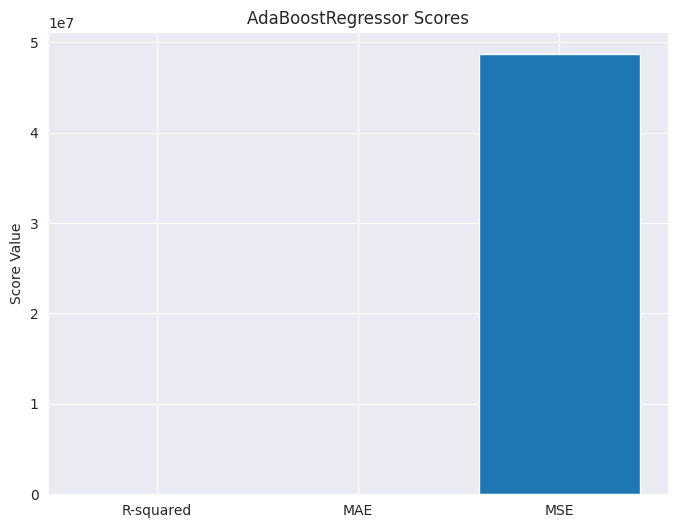

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the following scores from AdaBoostRegressor
r2 = 0.64  # Replace with your actual r2_score
mae = 4742.27  # Replace with your actual mean_absolute_error
mse = 48668064 # Replace with your actual mean_squared_error

# Create a matrix to store the scores
scores_matrix = np.array([[r2], [mae], [mse]])

# Create a bar plot
labels = ['R-squared', 'MAE', 'MSE']
plt.figure(figsize=(8, 6))
plt.bar(labels, scores_matrix.flatten())
plt.title('AdaBoostRegressor Scores')
plt.ylabel('Score Value')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have the following scores from different models
lr_r2 = 0.3145  # Replace with your actual r2_score
lr_mae = 4512.4709  # Replace with your actual mean_absolute_error
lr_mse = 94476093.1032 # Replace with your actual mean_squared_error

dt_r2 = 0.67018 # Replace with your actual r2_score
dt_mae = 1561.08256  # Replace with your actual mean_absolute_error
dt_mse = 45458331.1192 # Replace with your actual mean_squared_error

sv_r2 = -0.0194 # Replace with your actual r2_score
sv_mae = 6986.0890 # Replace with your actual mean_absolute_error
sv_mse = 140507179.4599 # Replace with your actual mean_squared_error

lor_r2 = 0.3224  # Replace with your actual r2_score
lor_mae = 4729.7981 # Replace with your actual mean_absolute_error
lor_mse = 93385926.33  # Replace with your actual mean_squared_error

rfr_r2 = 0.7153  # Replace with your actual r2_score
rfr_mae = 1846.688  # Replace with your actual mean_absolute_error
rfr_mse = 39231390.77 # Replace with your actual mean_squared_error

xgb_r2 = 0.756  # Replace with your actual r2_score
xgb_mae =1327.11  # Replace with your actual mean_absolute_error
xgb_mse = 33567717.59 # Replace with your actual mean_squared_error

adr_r2 = 0.64  # Replace with your actual r2_score
adr_mae = 4742 # Replace with your actual mean_absolute_error
adr_mse = 48668064 # Replace with your actual mean_squared_error

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'R-squared': [lr_r2, dt_r2, sv_r2, lor_r2, rfr_r2, xgb_r2, adr_r2],
    'MAE': [lr_mae, dt_mae, sv_mae, lor_mae, rfr_mae, xgb_mae, adr_mae],
    'MSE': [lr_mse, dt_mse, sv_mse, lor_mse, rfr_mse, xgb_mse, adr_mse]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Display the table
print(df_scores)


                 Model  R-squared         MAE           MSE
0    Linear Regression    0.31450  4512.47090  9.447609e+07
1        Decision Tree    0.67018  1561.08256  4.545833e+07
2                  SVR   -0.01940  6986.08900  1.405072e+08
3  Logistic Regression    0.32240  4729.79810  9.338593e+07
4        Random Forest    0.71530  1846.68800  3.923139e+07
5              XGBoost    0.75600  1327.11000  3.356772e+07
6             AdaBoost    0.64000  4742.00000  4.866806e+07


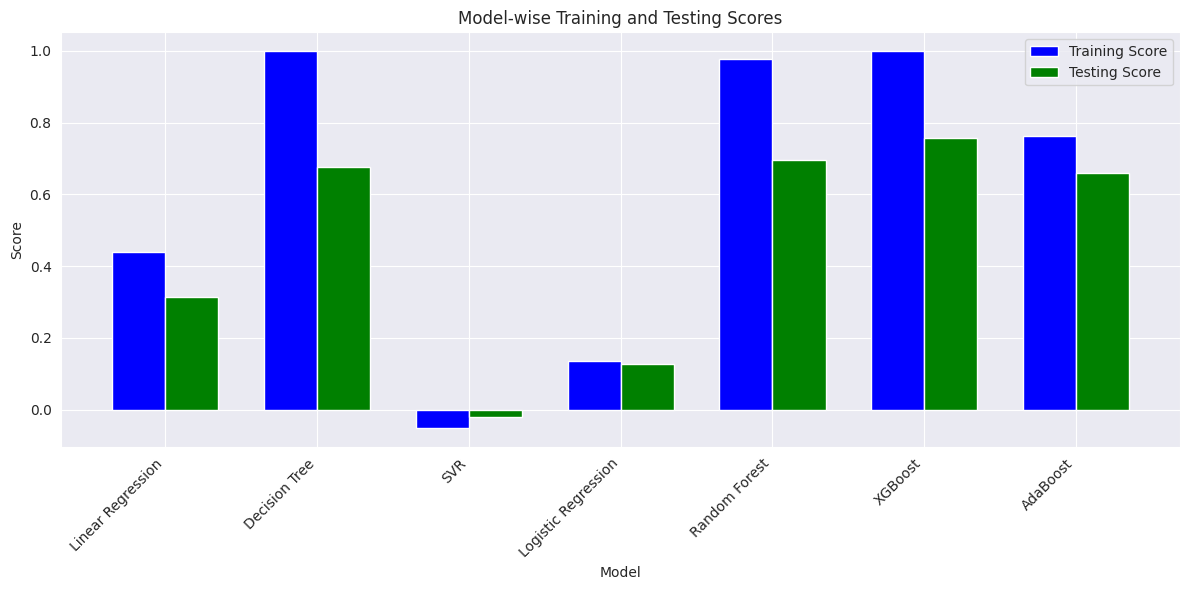

In [ ]:
#Train Test Score Model wise bar Plotting

import matplotlib.pyplot as plt

# Assuming you have the following scores from different models
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

sv_train_score = sv.score(X_train, y_train)
sv_test_score = sv.score(X_test, y_test)

lor_train_score = lor.score(X_train, y_train)
lor_test_score = lor.score(X_test, y_test)

rfr_train_score = Rfr.score(X_train, y_train)
rfr_test_score = Rfr.score(X_test, y_test)

xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)

adr_train_score = Adr.score(X_train, y_train)
adr_test_score = Adr.score(X_test, y_test)

# Create a dictionary to store the scores
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVR', 'Logistic Regression', 'Random Forest', 'XGBoost', 'AdaBoost'],
    'Training Score': [lr_train_score, dt_train_score, sv_train_score, lor_train_score, rfr_train_score, xgb_train_score, adr_train_score],
    'Testing Score': [lr_test_score, dt_test_score, sv_test_score, lor_test_score, rfr_test_score, xgb_test_score, adr_test_score]
}

# Create a pandas DataFrame
df_scores = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(df_scores))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, df_scores['Training Score'], color='blue', width=bar_width, label='Training Score')
plt.bar(r2, df_scores['Testing Score'], color='green', width=bar_width, label='Testing Score')

# Set the x-axis labels
plt.xticks([r + bar_width/2  for r in range(len(df_scores))], df_scores['Model'], rotation=45, ha='right')

# Add a legend
plt.legend()

# Add a title and labels
plt.title('Model-wise Training and Testing Scores')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import cross_val_score

# Define the number of folds for cross-validation
n_folds = 5  # You can adjust this value as needed

# Create a dictionary to store the cross-validation scores for each model
cv_scores = {}

# Perform cross-validation for each model
models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'SVR': sv,
    'Logistic Regression': lor,
    'Random Forest': Rfr,
    'XGBoost': xgb,
    'AdaBoost': Adr
}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=n_folds, scoring='r2')
    cv_scores[model_name] = scores

# Display the cross-validation scores
for model_name, scores in cv_scores.items():
    print(f'{model_name}:')
    print(f'  Mean R-squared: {scores.mean():.4f}')
    print(f'  Standard Deviation: {scores.std():.4f}')
    print()



Linear Regression:
  Mean R-squared: -3.3614
  Standard Deviation: 7.0993

Decision Tree:
  Mean R-squared: -0.2730
  Standard Deviation: 1.4808

SVR:
  Mean R-squared: -0.2644
  Standard Deviation: 0.2597

Logistic Regression:
  Mean R-squared: 0.1873
  Standard Deviation: 0.0384

Random Forest:
  Mean R-squared: 0.3162
  Standard Deviation: 0.4356

XGBoost:
  Mean R-squared: 0.2125
  Standard Deviation: 0.6024

AdaBoost:
  Mean R-squared: 0.1801
  Standard Deviation: 0.5922



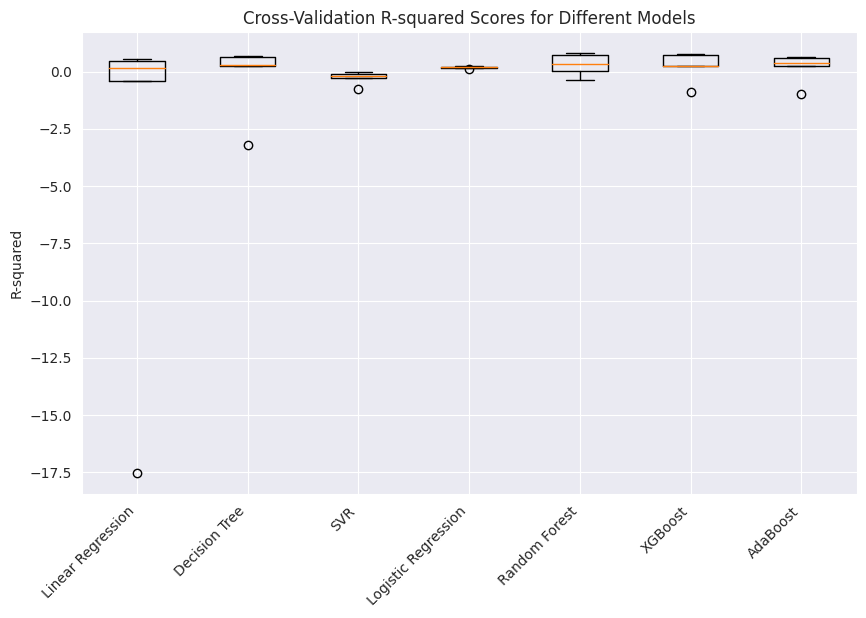

In [ ]:
# prompt: k cross validation of models in plots

import matplotlib.pyplot as plt

# Assuming you have the cv_scores dictionary from the previous code

# Create a box plot to visualize the cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot([scores for scores in cv_scores.values()], labels=cv_scores.keys())
plt.title('Cross-Validation R-squared Scores for Different Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.show()
